In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
# Parameters
Lx, Lz = 20,1
Nx, Nz = 1280, 64
Ra_M_1e6_32 = 1.0e6
Ra_M_28e6_32 = 2.8e6
Ra_M_45e6_32 = 4.5e6
Ra_M_45e6_64 = 4.5e6
Ra_M_7e6_64 = 7.0e6
Ra_M_1e7_64 = 1.0e7
M_0 = 0
M_H = -1


Prandtl = 1.0
stop_sim_time = 2000
nu_1e6_32 = (Ra_M_1e6_32 / (0.7*(M_0-M_H)*Lz**3))**(-1/2)
nu_28e6_32 = (Ra_M_28e6_32 / (0.7*(M_0-M_H)*Lz**3))**(-1/2)
nu_45e6_32 = (Ra_M_45e6_32 / (0.7*(M_0-M_H)*Lz**3))**(-1/2)
nu_45e6_64 = (Ra_M_45e6_64 / (0.7*(M_0-M_H)*Lz**3))**(-1/2)
nu_7e6_64 = (Ra_M_7e6_64 / (1.0*(M_0-M_H)*Lz**3))**(-1/2)
nu_1e7_64 = (Ra_M_1e7_64 / (1.0*(M_0-M_H)*Lz**3))**(-1/2)

In [4]:
folder_dir_1e6_32 = "rayleigh_1e6_32/analysis"
file_paths_1e6_32 = [os.path.join(folder_dir_1e6_32, file) for file in listdir(folder_dir_1e6_32) 
                   if os.path.isfile(os.path.join(folder_dir_1e6_32, file)) and file.endswith('.h5')]
file_paths_1e6_32.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths_1e6_32)
####
####
folder_dir_28e6_32 = "rayleigh_28e6_32/analysis"
file_paths_28e6_32 = [os.path.join(folder_dir_28e6_32, file) for file in listdir(folder_dir_28e6_32) 
                   if os.path.isfile(os.path.join(folder_dir_28e6_32, file)) and file.endswith('.h5')]
file_paths_28e6_32.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths_28e6_32)
####
####
folder_dir_45e6_32 = "rayleigh_45e6_32/analysis"
file_paths_45e6_32 = [os.path.join(folder_dir_45e6_32, file) for file in listdir(folder_dir_45e6_32) 
                   if os.path.isfile(os.path.join(folder_dir_45e6_32, file)) and file.endswith('.h5')]
file_paths_45e6_32.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths_45e6_32)
####
####
folder_dir_45e6_64 = "rayleigh_45e6_64/analysis"
file_paths_45e6_64 = [os.path.join(folder_dir_45e6_64, file) for file in listdir(folder_dir_45e6_64) 
                   if os.path.isfile(os.path.join(folder_dir_45e6_64, file)) and file.endswith('.h5')]
file_paths_45e6_64.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths_45e6_64)
####
####
folder_dir_7e6_64 = "rayleigh_7e6_64/analysis"
file_paths_7e6_64 = [os.path.join(folder_dir_7e6_64, file) for file in listdir(folder_dir_7e6_64) 
                   if os.path.isfile(os.path.join(folder_dir_7e6_64, file)) and file.endswith('.h5')]
file_paths_7e6_64.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths_7e6_64)
####
####
folder_dir_1e7_64 = "rayleigh_1e7_64/analysis"
file_paths_1e7_64 = [os.path.join(folder_dir_1e7_64, file) for file in listdir(folder_dir_1e7_64) 
                   if os.path.isfile(os.path.join(folder_dir_1e7_64, file)) and file.endswith('.h5')]
file_paths_1e7_64.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths_1e7_64)

['rayleigh_1e6_32/analysis/analysis_s1.h5', 'rayleigh_1e6_32/analysis/analysis_s2.h5', 'rayleigh_1e6_32/analysis/analysis_s3.h5', 'rayleigh_1e6_32/analysis/analysis_s4.h5', 'rayleigh_1e6_32/analysis/analysis_s5.h5', 'rayleigh_1e6_32/analysis/analysis_s6.h5', 'rayleigh_1e6_32/analysis/analysis_s7.h5', 'rayleigh_1e6_32/analysis/analysis_s8.h5', 'rayleigh_1e6_32/analysis/analysis_s9.h5', 'rayleigh_1e6_32/analysis/analysis_s10.h5']
['rayleigh_28e6_32/analysis/analysis_s1.h5', 'rayleigh_28e6_32/analysis/analysis_s2.h5', 'rayleigh_28e6_32/analysis/analysis_s3.h5', 'rayleigh_28e6_32/analysis/analysis_s4.h5', 'rayleigh_28e6_32/analysis/analysis_s5.h5', 'rayleigh_28e6_32/analysis/analysis_s6.h5', 'rayleigh_28e6_32/analysis/analysis_s7.h5', 'rayleigh_28e6_32/analysis/analysis_s8.h5', 'rayleigh_28e6_32/analysis/analysis_s9.h5', 'rayleigh_28e6_32/analysis/analysis_s10.h5', 'rayleigh_28e6_32/analysis/analysis_s11.h5', 'rayleigh_28e6_32/analysis/analysis_s12.h5', 'rayleigh_28e6_32/analysis/analysis_

In [5]:
"""
TOTAL KE
"""
all_tot_ke_1e6_32 = []
for file in file_paths_1e6_32:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke_1e6_32.append(np.sum(tot_ke[t]))
print(max(all_tot_ke_1e6_32))


all_tot_ke_28e6_32 = []
for file in file_paths_28e6_32:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke_28e6_32.append(np.sum(tot_ke[t]))
print(max(all_tot_ke_28e6_32))


all_tot_ke_45e6_32 = []
for file in file_paths_45e6_32:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke_45e6_32.append(np.sum(tot_ke[t]))
print(max(all_tot_ke_45e6_32))


all_tot_ke_45e6_64 = []
for file in file_paths_45e6_64:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke_45e6_64.append(np.sum(tot_ke[t]))
print(max(all_tot_ke_45e6_64))


all_tot_ke_7e6_64 = []
for file in file_paths_7e6_64:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke_7e6_64.append(np.sum(tot_ke[t]))
print(max(all_tot_ke_7e6_64))


all_tot_ke_1e7_64 = []
for file in file_paths_1e7_64:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke_1e7_64.append(np.sum(tot_ke[t]))
print(max(all_tot_ke_1e7_64))




"""
mean KE
"""
all_mean_ke_1e6_32 = []
for file in file_paths_1e6_32:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke_1e6_32.append(np.average(mean_ke[t]))
print(max(all_mean_ke_1e6_32))


all_mean_ke_28e6_32 = []
for file in file_paths_28e6_32:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke_28e6_32.append(np.average(mean_ke[t]))
print(max(all_mean_ke_28e6_32))


all_mean_ke_45e6_32 = []
for file in file_paths_45e6_32:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke_45e6_32.append(np.average(mean_ke[t]))
print(max(all_mean_ke_45e6_32))


all_mean_ke_45e6_64 = []
for file in file_paths_45e6_64:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke_45e6_64.append(np.average(mean_ke[t]))
print(max(all_mean_ke_45e6_64))
            
            
all_mean_ke_7e6_64 = []
for file in file_paths_7e6_64:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke_7e6_64.append(np.average(mean_ke[t]))
print(max(all_mean_ke_7e6_64))


all_mean_ke_1e7_64 = []
for file in file_paths_1e7_64:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke_1e7_64.append(np.average(mean_ke[t]))
print(max(all_mean_ke_1e7_64))

0.4882647736963135
0.504279741736292
1.2157177557621823
0.26128785070815946
0.25583934677679143
0.338571624740267
0.6626816557891677
1.3613826378326177
4.095444875000726
0.5649550739033582
0.3340752874819592
0.3667468782294203


17386
17386


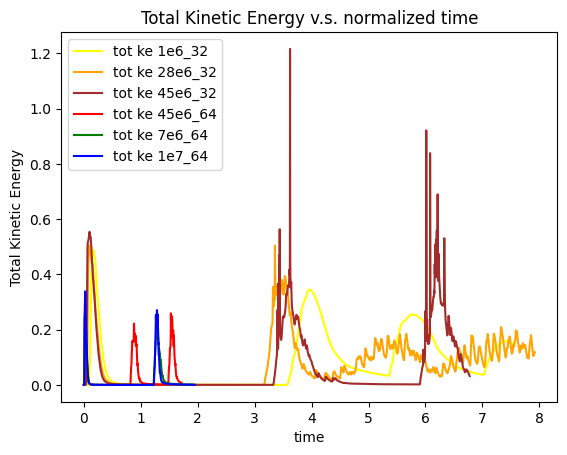

/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:22: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis_1e6_32, np.log(all_tot_ke_1e6_32), color = 'yellow', label='log tot ke 1e6_32')
/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:23: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis_28e6_32, np.log(all_tot_ke_28e6_32), color = 'orange', label='log tot ke 28e6_32')
/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis_45e6_32, np.log(all_tot_ke_45e6_32), color = 'brown', label='log tot ke 45e6_32')
/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:25: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis_45e6_64, np.log(all_tot_ke_45e6_64), color = 'red', label='log tot ke 45e6_64')
/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:26: RuntimeWarning: divide by zero encounter

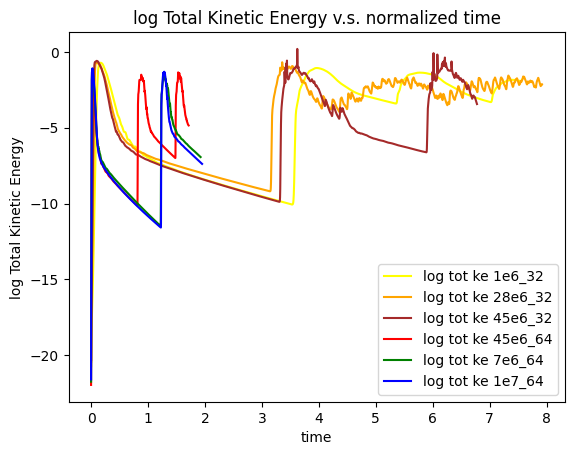

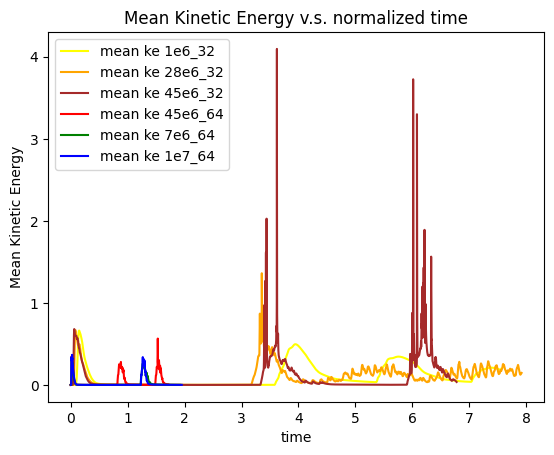

/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:49: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis_1e6_32, np.log(all_mean_ke_1e6_32), color = 'yellow', label='log mean ke 1e6_32')
/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:50: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis_28e6_32, np.log(all_mean_ke_28e6_32), color = 'orange', label='log mean ke 28e6_32')
/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:51: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis_45e6_32, np.log(all_mean_ke_45e6_32), color = 'brown', label='log mean ke 45e6_32')
/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:52: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis_45e6_64, np.log(all_mean_ke_45e6_64), color = 'red', label='log mean ke 45e6_64')
/state/partition1/job-40392952/ipykernel_3119528/1479732084.py:53: RuntimeWarning: divide by zero e

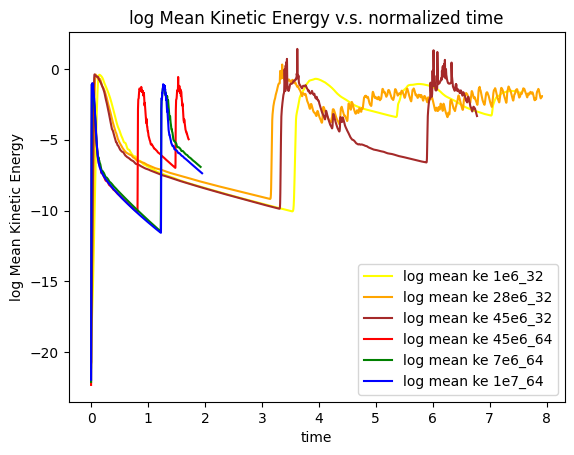

In [8]:
print(len(all_tot_ke_45e6_64))
figure_x_axis_1e6_32 = np.array([(x*nu_1e6_32/(1**2)) for x in range(1, len(all_tot_ke_1e6_32)+1)])
figure_x_axis_28e6_32 = np.array([(x*nu_28e6_32/(1**2)) for x in range(1, len(all_tot_ke_28e6_32)+1)])
figure_x_axis_45e6_32 = np.array([(x*nu_45e6_32/(1**2)) for x in range(1, len(all_tot_ke_45e6_32)+1)])
figure_x_axis_45e6_64 = np.array([(x*nu_45e6_64/(2**2)) for x in range(1, len(all_tot_ke_45e6_64)+1)])
figure_x_axis_7e6_64 = np.array([(x*nu_7e6_64/(2**2)) for x in range(1, len(all_tot_ke_7e6_64)+1)])
figure_x_axis_1e7_64 = np.array([(x*nu_1e7_64/(2**2)) for x in range(1, len(all_tot_ke_1e7_64)+1)])
print(len(figure_x_axis_45e6_64))
plt.plot(figure_x_axis_1e6_32, all_tot_ke_1e6_32, color = 'yellow', label='tot ke 1e6_32')
plt.plot(figure_x_axis_28e6_32, all_tot_ke_28e6_32, color = 'orange', label='tot ke 28e6_32')
plt.plot(figure_x_axis_45e6_32, all_tot_ke_45e6_32, color = 'brown', label='tot ke 45e6_32')
plt.plot(figure_x_axis_45e6_64, all_tot_ke_45e6_64, color = 'red', label='tot ke 45e6_64')
plt.plot(figure_x_axis_7e6_64, all_tot_ke_7e6_64, color='green', label='tot ke 7e6_64')
plt.plot(figure_x_axis_1e7_64, all_tot_ke_1e7_64, color='blue', label='tot ke 1e7_64')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.legend()
plt.show()
plt.clf()

plt.plot(figure_x_axis_1e6_32, np.log(all_tot_ke_1e6_32), color = 'yellow', label='log tot ke 1e6_32')
plt.plot(figure_x_axis_28e6_32, np.log(all_tot_ke_28e6_32), color = 'orange', label='log tot ke 28e6_32')
plt.plot(figure_x_axis_45e6_32, np.log(all_tot_ke_45e6_32), color = 'brown', label='log tot ke 45e6_32')
plt.plot(figure_x_axis_45e6_64, np.log(all_tot_ke_45e6_64), color = 'red', label='log tot ke 45e6_64')
plt.plot(figure_x_axis_7e6_64, np.log(all_tot_ke_7e6_64), color = 'green', label='log tot ke 7e6_64')
plt.plot(figure_x_axis_1e7_64, np.log(all_tot_ke_1e7_64), color = 'blue', label='log tot ke 1e7_64')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.legend()
plt.show()
plt.clf()


plt.plot(figure_x_axis_1e6_32, all_mean_ke_1e6_32, color = 'yellow', label='mean ke 1e6_32')
plt.plot(figure_x_axis_28e6_32, all_mean_ke_28e6_32, color = 'orange', label='mean ke 28e6_32')
plt.plot(figure_x_axis_45e6_32, all_mean_ke_45e6_32, color = 'brown', label='mean ke 45e6_32')
plt.plot(figure_x_axis_45e6_64, all_mean_ke_45e6_64, color = 'red', label='mean ke 45e6_64')
plt.plot(figure_x_axis_7e6_64, all_mean_ke_7e6_64, color = 'green', label='mean ke 7e6_64')
plt.plot(figure_x_axis_1e7_64, all_mean_ke_1e7_64, color = 'blue', label='mean ke 1e7_64')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.legend()
plt.show()
plt.clf()

plt.plot(figure_x_axis_1e6_32, np.log(all_mean_ke_1e6_32), color = 'yellow', label='log mean ke 1e6_32')
plt.plot(figure_x_axis_28e6_32, np.log(all_mean_ke_28e6_32), color = 'orange', label='log mean ke 28e6_32')
plt.plot(figure_x_axis_45e6_32, np.log(all_mean_ke_45e6_32), color = 'brown', label='log mean ke 45e6_32')
plt.plot(figure_x_axis_45e6_64, np.log(all_mean_ke_45e6_64), color = 'red', label='log mean ke 45e6_64')
plt.plot(figure_x_axis_7e6_64, np.log(all_mean_ke_7e6_64), color = 'green', label='log mean ke 7e6_64')
plt.plot(figure_x_axis_1e7_64, np.log(all_mean_ke_1e7_64), color = 'blue', label='log mean ke 1e7_64')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Mean Kinetic Energy v.s. normalized time')
plt.legend()
plt.show()

In [11]:
"""
TOTAL KE
"""
all_tot_uy_1e6_32 = []
for file in file_paths_1e6_32:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy_1e6_32.append(uy_each)


all_tot_uy_28e6_32 = []
for file in file_paths_28e6_32:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy_28e6_32.append(uy_each)


all_tot_uy_45e6_32 = []
for file in file_paths_45e6_32:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy_45e6_32.append(uy_each)



all_tot_uy_45e6_64 = []
for file in file_paths_45e6_64:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy_45e6_64.append(uy_each)



all_tot_uy_7e6_64 = []
for file in file_paths_7e6_64:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy_7e6_64.append(uy_each)



all_tot_uy_1e7_64 = []
for file in file_paths_1e7_64:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy_1e7_64.append(uy_each)






1.2157177557621823
0.26128785070815946
0.25583934677679143
0.338571624740267


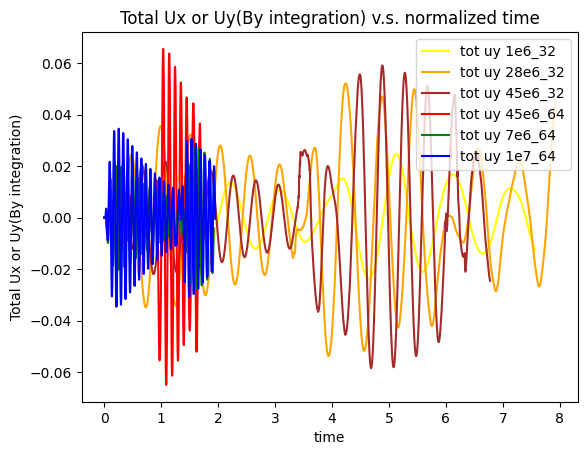

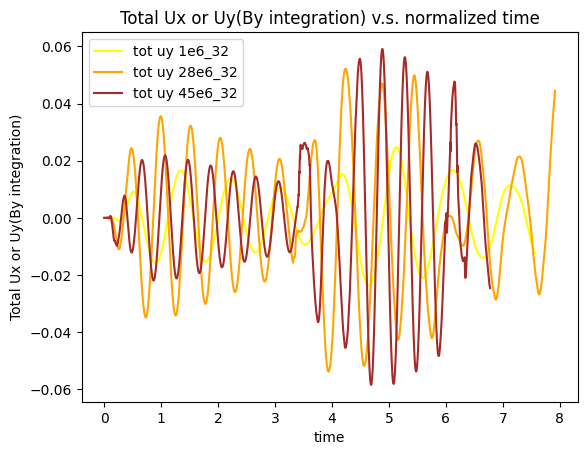

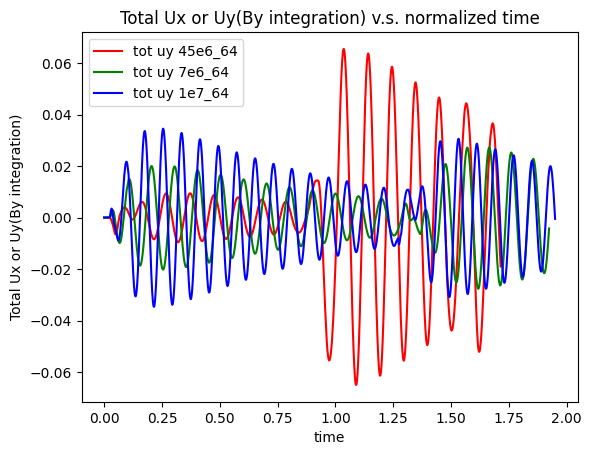

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(figure_x_axis_1e6_32, all_tot_uy_1e6_32, color = 'yellow', label='tot uy 1e6_32')
plt.plot(figure_x_axis_28e6_32, all_tot_uy_28e6_32, color = 'orange', label='tot uy 28e6_32')
plt.plot(figure_x_axis_45e6_32, all_tot_uy_45e6_32, color = 'brown', label='tot uy 45e6_32')
plt.plot(figure_x_axis_45e6_64, all_tot_uy_45e6_64, color = 'red', label='tot uy 45e6_64')
plt.plot(figure_x_axis_7e6_64, all_tot_uy_7e6_64, color = 'green', label='tot uy 7e6_64')
plt.plot(figure_x_axis_1e7_64, all_tot_uy_1e7_64, color = 'blue', label='tot uy 1e7_64')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()

plt.plot(figure_x_axis_1e6_32, all_tot_uy_1e6_32, color = 'yellow', label='tot uy 1e6_32')
plt.plot(figure_x_axis_28e6_32, all_tot_uy_28e6_32, color = 'orange', label='tot uy 28e6_32')
plt.plot(figure_x_axis_45e6_32, all_tot_uy_45e6_32, color = 'brown', label='tot uy 45e6_32')
#plt.plot(figure_x_axis_45e6_64, all_tot_uy_45e6_64, color = 'red', label='tot uy 45e6_64')
#plt.plot(figure_x_axis_7e6_64, all_tot_uy_7e6_64, color = 'green', label='tot uy 7e6_64')
#plt.plot(figure_x_axis_1e7_64, all_tot_uy_1e7_64, color = 'blue', label='tot uy 1e7_64')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()


#plt.plot(figure_x_axis_1e6_32, all_tot_uy_1e6_32, color = 'yellow', label='tot uy 1e6_32')
#plt.plot(figure_x_axis_28e6_32, all_tot_uy_28e6_32, color = 'orange', label='tot uy 28e6_32')
#plt.plot(figure_x_axis_45e6_32, all_tot_uy_45e6_32, color = 'brown', label='tot uy 45e6_32')
plt.plot(figure_x_axis_45e6_64, all_tot_uy_45e6_64, color = 'red', label='tot uy 45e6_64')
plt.plot(figure_x_axis_7e6_64, all_tot_uy_7e6_64, color = 'green', label='tot uy 7e6_64')
plt.plot(figure_x_axis_1e7_64, all_tot_uy_1e7_64, color = 'blue', label='tot uy 1e7_64')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()